

# Project: TMDB 5000 Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We have obtained a *CSV* file of our data from this website: **[TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)** containing information about 10,000 movies, short films and tv series collected to be analyzed.

This data set contains information about 10,000 movies collected from The Movie Database (TMDB), including user ratings and revenue, runtime and budget.
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. 
- There are some odd characters in the ‘cast’ column.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

This dataset analysis aims at exploring the factors that may be related the preferences of the movies clients. These factors addressed in this analysis are:
- The movie title : that repesents the name of the movie shown.
- The director name : that repesents the name of the director produced the most preferable or unpreferable movies.
- The runtime: that repesents the duration of the movie shown in minutes.

This dataset analysis has one dependent variable: (voting in average over the years); and 3 independent variables: (the movie title- the director name- the runtime in minutes).

In this analysis; we will answer the following questions:
- Q1:Which movies are with the highest voting rates? Which ones are with the lowest voting rates?
- Q2: Which directors produced the movies with the highest voting rates? Which ones produced the movies with the lowest voting rates?
- Q3: How is the longer movie runtime preferable to the clients?

### We'll start by importing some packages we'll use and then import the data:

In [1]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%pdb

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
sb.set_context("notebook", font_scale=1.25)
import csv
import time


Automatic pdb calling has been turned ON


In [2]:
pip install numerize 

Note: you may need to restart the kernel to use updated packages.


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, We will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### To explore General Properties of the dataset:

To read the dataset & to display the first 3 rows:

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


To display the last 3 rows of the dataset:

In [4]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


To view the 21 columns of the data:

In [5]:
print('This Dataset has the following column titles: {}'.format(list(df.columns)))

This Dataset has the following column titles: ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [6]:
print("This dataset has (Rows,Columns): {}.".format(df.shape))

This dataset has (Rows,Columns): (10866, 21).


To view the descriptive statistics for each column of the dataset:

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As shown above:
- The min value in 5 columns: (budget, revenue, runtime, budget_adj, revenue_adj) has been entered by error with zero value; that may mislead our analsis, so it shall be replaced by its mean. 
- 'Release Date' column format shall be replaced into Standard Datetime format:

To get a brief summary of the dataset & to determine the number of non-null values in each column:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning - Dropping unusable Dataset columns:

After discussing the structure of the data and the problems that need to be cleaned, perform those cleaning steps in this section.


To Drop unusable Dataset columns in our analysis:

In [9]:
df.drop(['imdb_id','popularity','homepage','tagline', 'keywords', 'overview'], axis = 1, inplace = True)

### Data Cleaning - Cleaning Duplicates

To check unique rows:

In [10]:
print("This dataset has {} unique row/s.".format(df['id'].nunique()))

This dataset has 10865 unique row/s.


To check duplicate rows:

In [11]:
print("This dataset has {} row/s duplicated by error.".format(df.duplicated().sum()))

This dataset has 1 row/s duplicated by error.


To remove duplicated rows:

In [12]:
df.drop_duplicates(inplace = True)
df.describe()
print("After Removing Duplicated Values, We have (Rows,Columns): {}.".format(df.shape))

After Removing Duplicated Values, We have (Rows,Columns): (10865, 15).


### Data Cleaning - Changing Datatypes

To change *'Release Date'* column format into Standard *Datetime format*:

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

### Data Cleaning - replacing 0 values by the mean:

To replace 0 values shown in the dataset by the mean:

In [14]:
df['budget'] = df['budget'].replace(0, df['budget'].mean())
df['revenue'] = df['revenue'].replace(0, df['revenue'].mean())
df['runtime'] = df['runtime'].replace(0, df['runtime'].mean())
df['budget_adj'] = df['budget_adj'].replace(0, df['budget_adj'].mean())
df['revenue_adj'] = df['revenue_adj'].replace(0, df['revenue_adj'].mean())
df.describe()

,id,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,2.229110e+07,6.187923e+07,102.363021,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07
std,92134.091971,2.801385e+07,1.110236e+08,30.904043,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08
min,5.000000,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,1.462429e+07,3.982690e+07,90.000000,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,20662.000000,1.462429e+07,3.982690e+07,99.000000,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,75612.000000,1.500000e+07,3.982690e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07
max,417859.000000,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning - Eliminating Null-values

To explore number of Null-values in each column in the Dataset:

In [15]:
df.isnull().sum()

id                         0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

To check Non-values:

In [16]:
print('Thus, This Dataset has a total of {} Non-values that can be replaced by zero; as in the following step.'.format(df.isnull().sum().sum()))

Thus, This Dataset has a total of 1173 Non-values that can be replaced by zero; as in the following step.


To remove Null-values in each column in the Dataset:

In [17]:
df.dropna(axis = 0, inplace = True, subset = ['director'])
df.dropna(axis = 0, inplace = True, subset = ['cast'])
df.dropna(axis = 0, inplace = True, subset = ['genres'])
df.dropna(axis = 0, inplace = True, subset = ['production_companies'])
df.isnull().sum()

id                      0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [18]:
print('After cleaning this Dataset, it has a total of {} Non-values.'.format(df.isnull().sum().sum()))

After cleaning this Dataset, it has a total of 0 Non-values.


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Which movies are with the highest voting rates? Which ones are with the lowest voting rates?

In [19]:
print(df.original_title[df['vote_average']==df['vote_average'].max()])

6911    Pink Floyd: Pulse
Name: original_title, dtype: object


In [20]:
print(df.original_title[df['vote_average']==df['vote_average'].min()])

7772                Transmorphers
10865    Manos: The Hands of Fate
Name: original_title, dtype: object


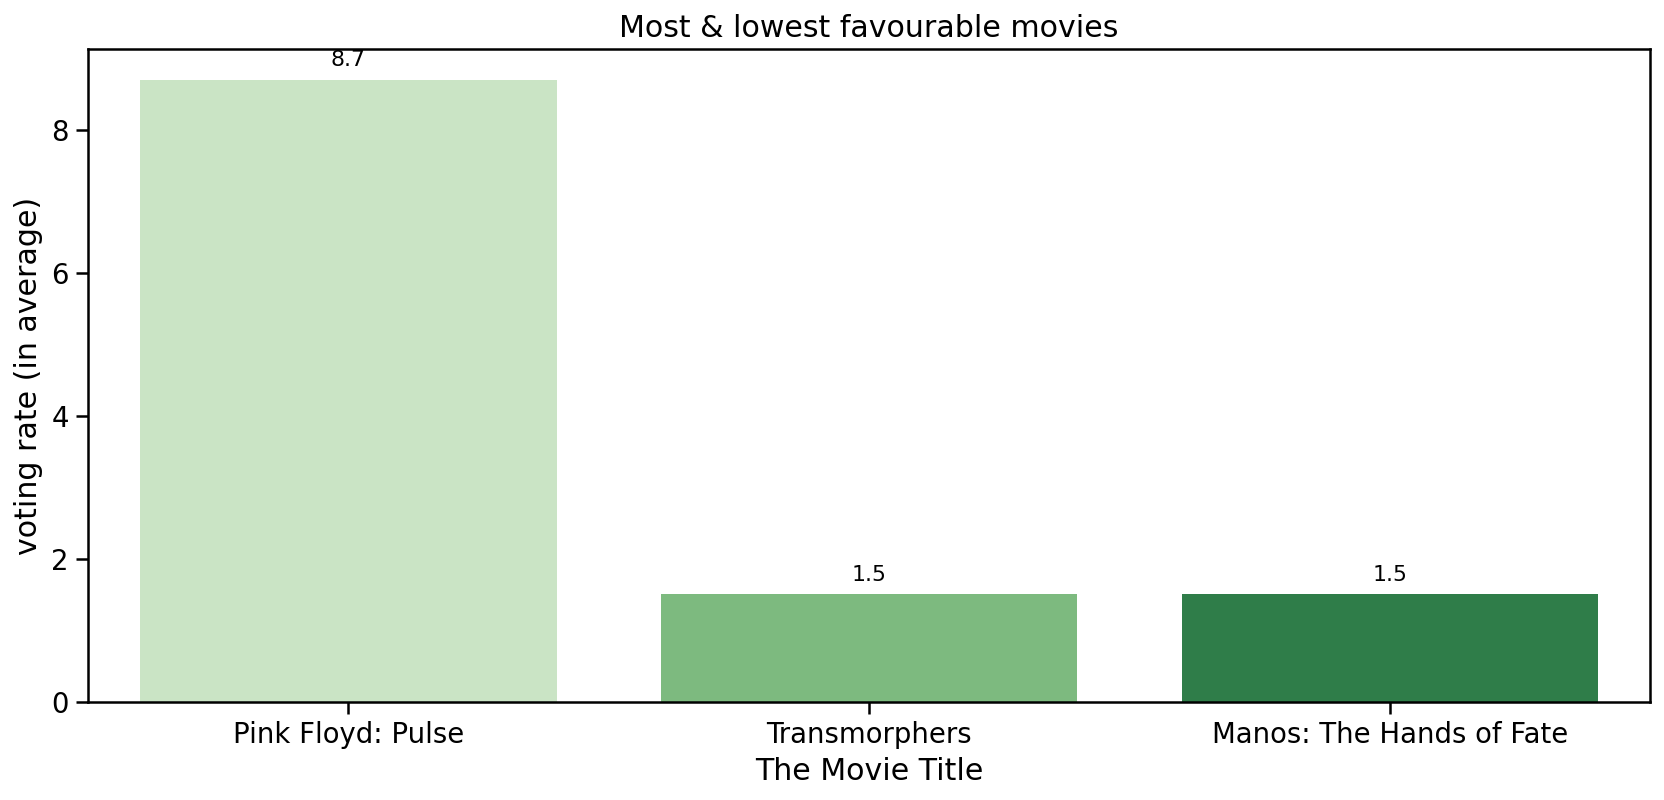

In [21]:
plt.figure(figsize=(14,6))
d_max_min = df[(df.vote_average == df['vote_average'].max())|(df.vote_average == df['vote_average'].min())]
graph_max_min= sb.barplot(x=d_max_min['original_title'], y=d_max_min['vote_average'], palette = 'Greens')
plt.title('Most & lowest favourable movies')
plt.xlabel('The Movie Title')
plt.ylabel('voting rate (in average)')
for p in graph_max_min.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')
plt.show()

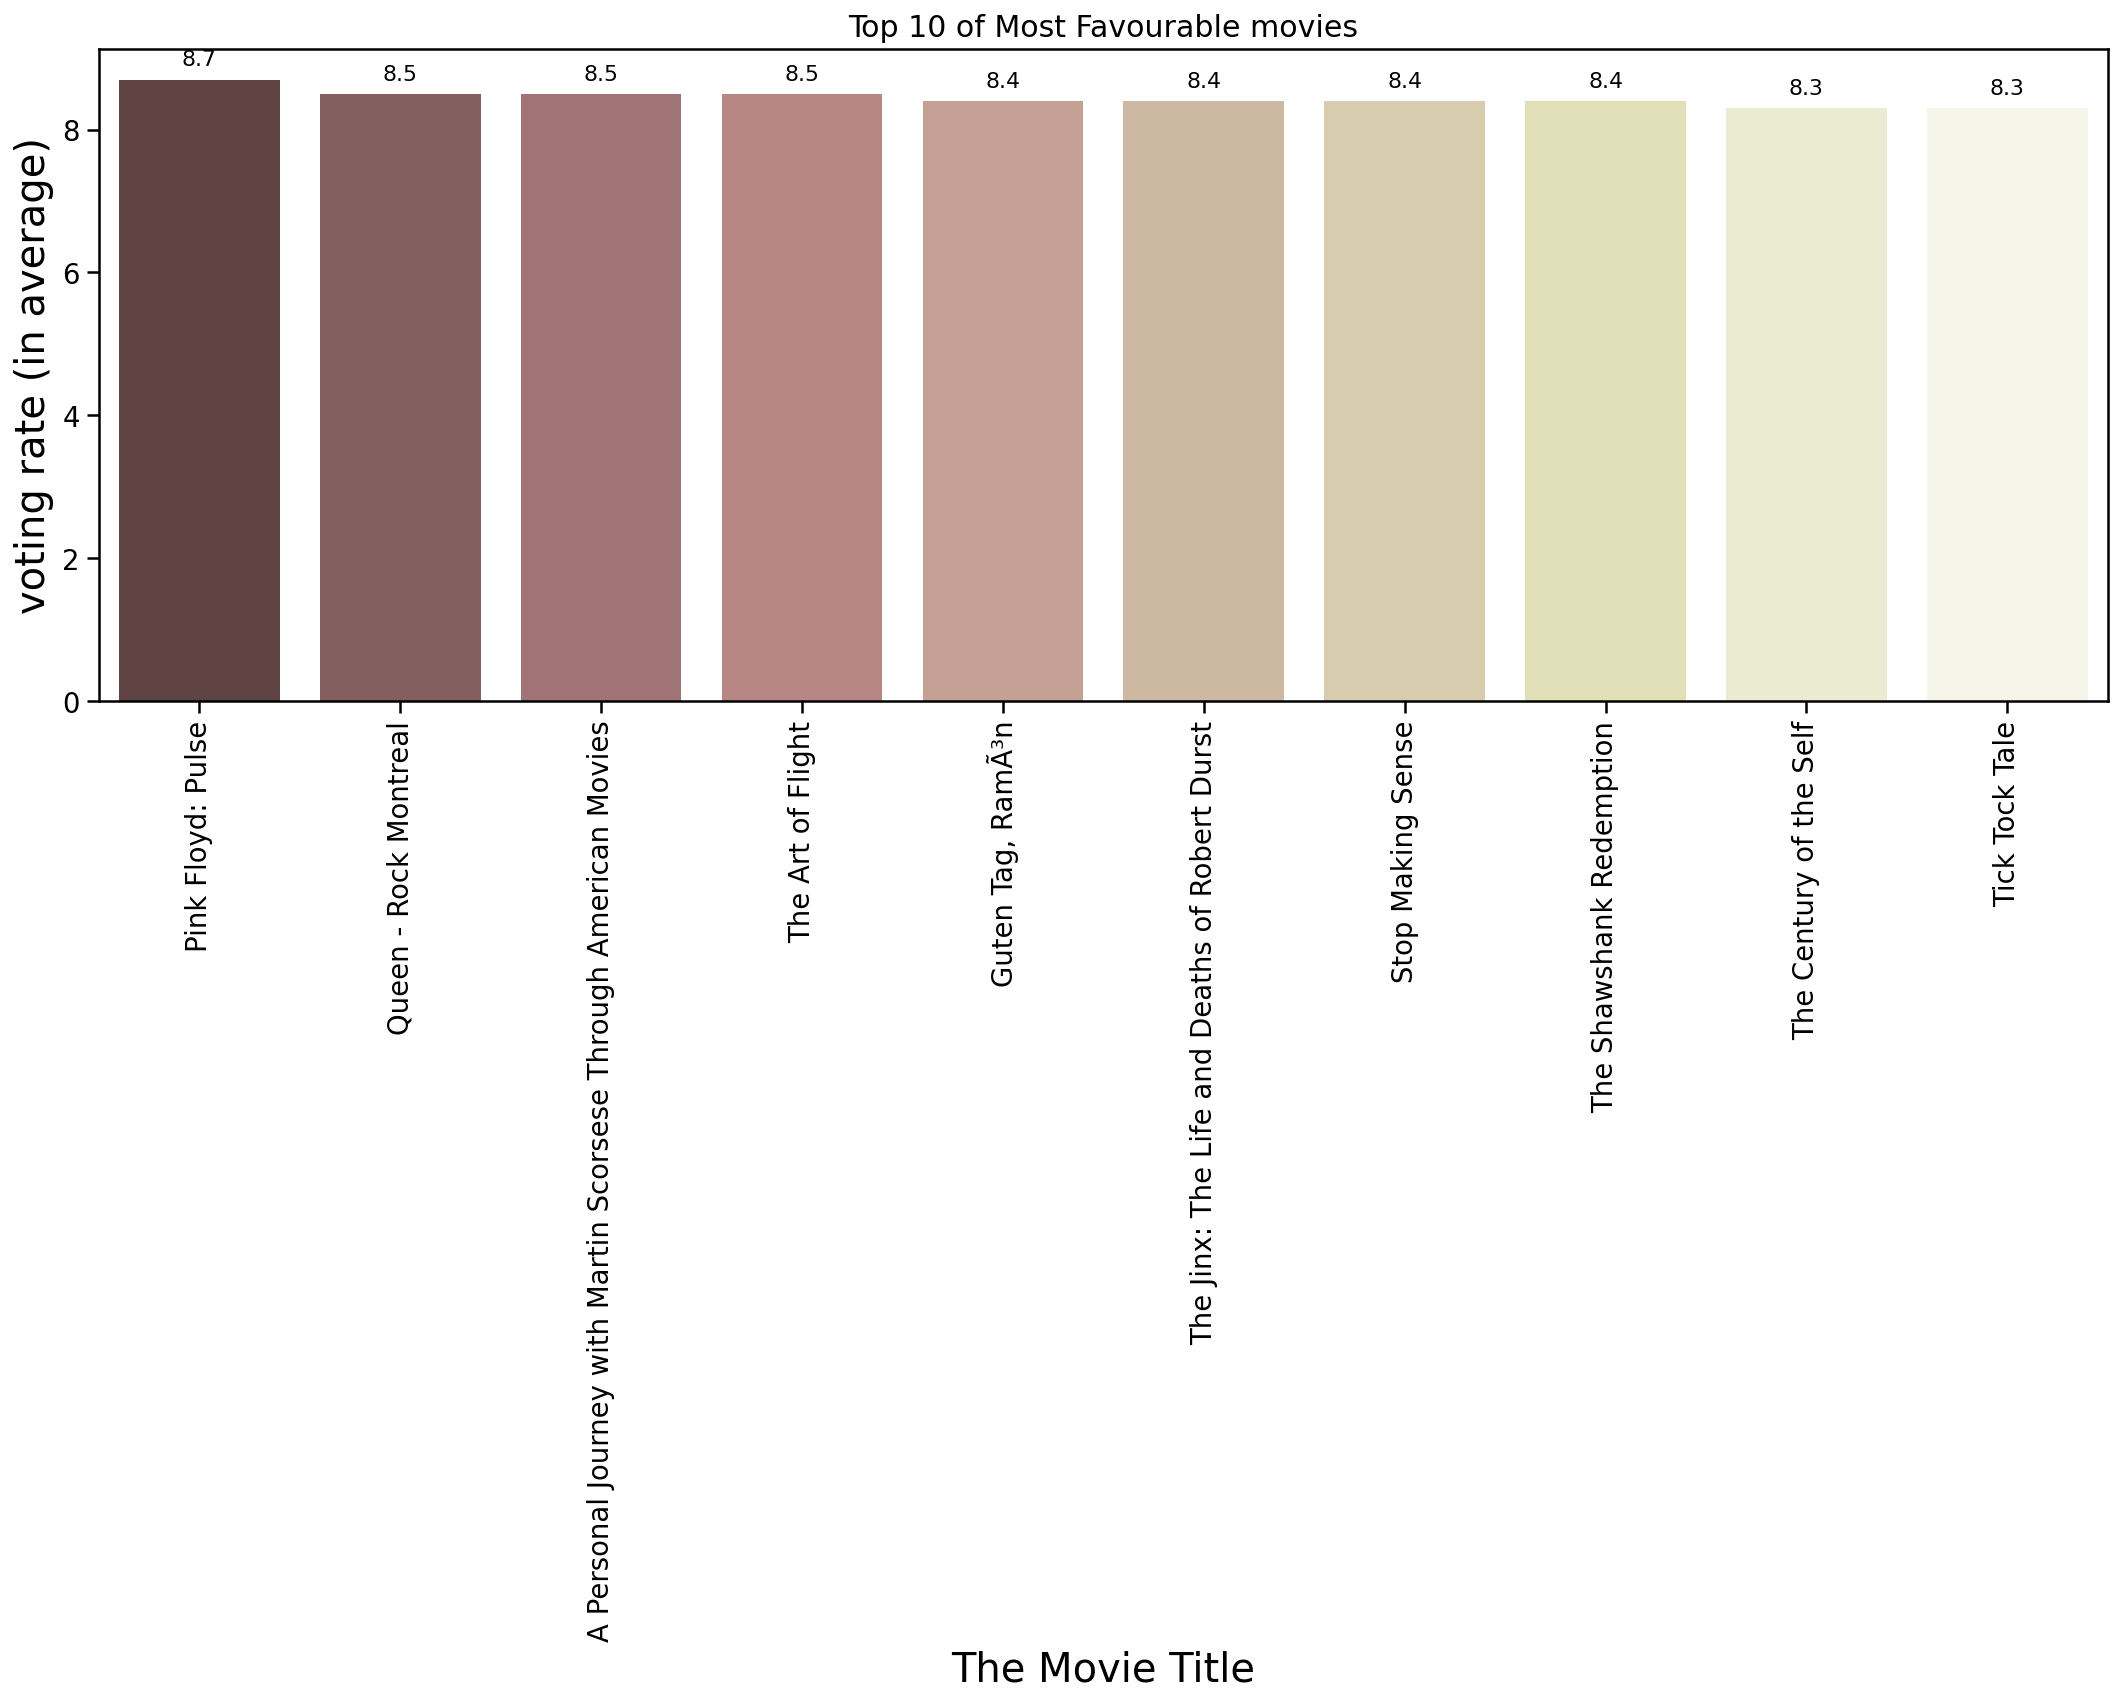

In [22]:
plt.figure(figsize=(18,6))
dm = df[['original_title','vote_average']].sort_values('vote_average', ascending = False).head(10)
graphm = sb.barplot(x='original_title', y='vote_average', data=dm, palette='pink')
plt.title('Top 10 of Most Favourable movies')
plt.xlabel('The Movie Title', fontsize=20)
plt.ylabel('voting rate (in average)', fontsize=20)
plt.xticks(rotation = 90)
for p in graphm.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')
plt.show()
    

As shown above;
- The movie (The Story of Film: An Odyssey) is the most favourable movie for the clients in the dataset; as it has a score of 9.2, followed by the movie (The Mask) with a score of 8.9.
- Top 10 favourable movies voting scores in the dataset ranges from 9.2 to 8.5; There are a sight difference between the 1st & the 10th favourable movie.
- Both movies (Transmorphers) & (Manos: The Hands of Fate) are the most unfavourable movie in the dataset; as both has a score of 1.5.

### Research Question 2 : Which directors produced the movies with the highest voting rates? Which ones produced the movies with the lowest voting rates?

In [23]:
print(df.director[df['vote_average']==df['vote_average'].max()])

6911    David Mallet
Name: director, dtype: object


In [24]:
print(df.director[df['vote_average']==df['vote_average'].min()])

7772          Leigh Scott
10865    Harold P. Warren
Name: director, dtype: object


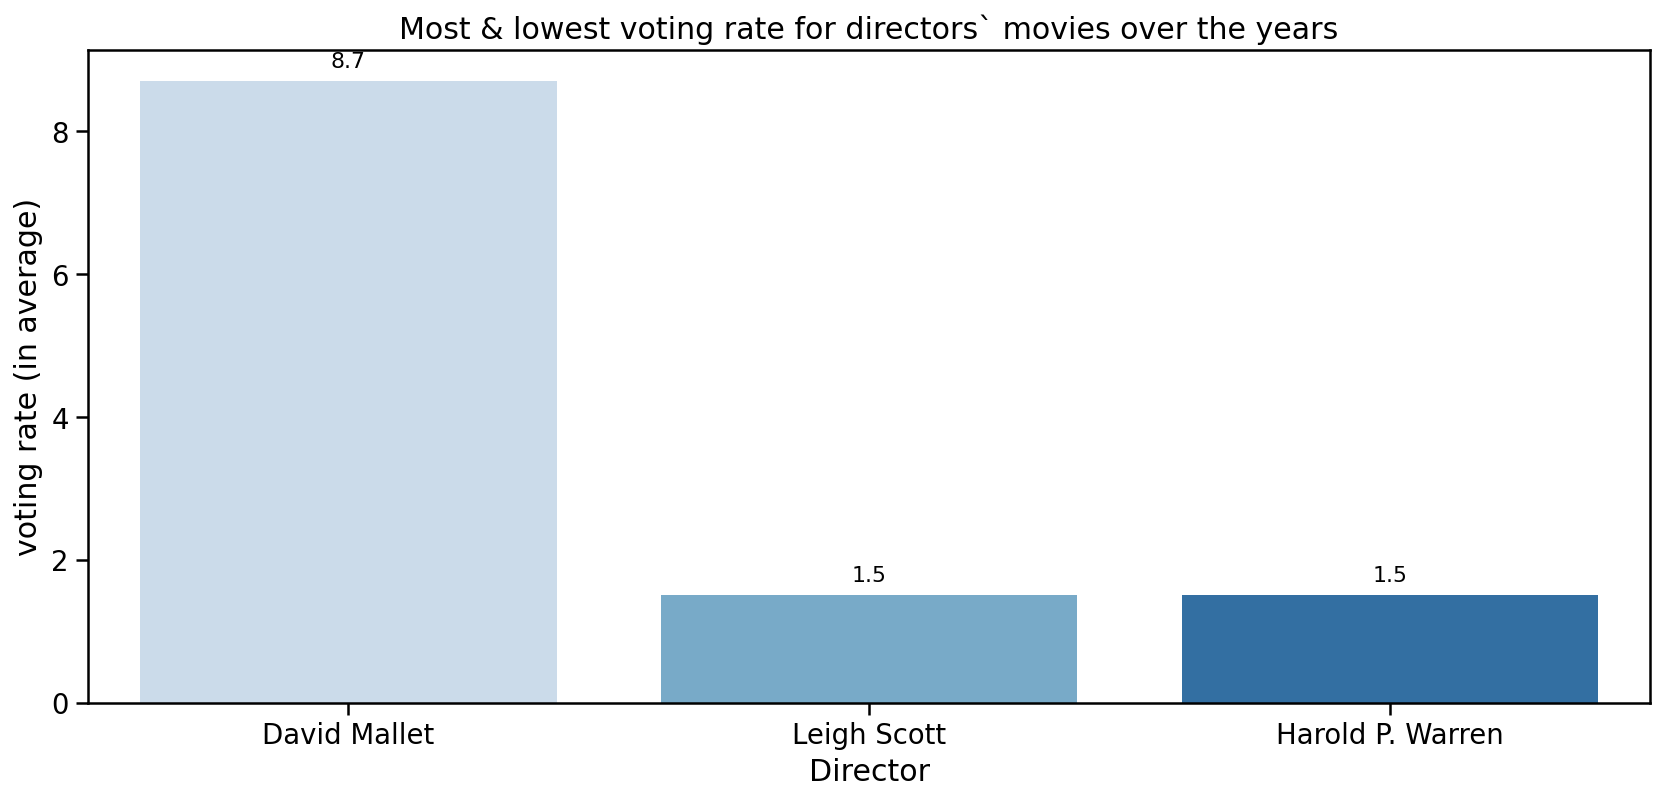

In [25]:
plt.figure(figsize=(14,6))
dd_max_min = df[(df.vote_average == df['vote_average'].max())|(df.vote_average == df['vote_average'].min())]
graphd_max_min= sb.barplot(x=dd_max_min['director'], y=dd_max_min['vote_average'], palette = 'Blues')
plt.title('Most & lowest voting rate for directors` movies over the years')
plt.xlabel('Director')
plt.ylabel('voting rate (in average)')
for p in graphd_max_min.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')
plt.show()

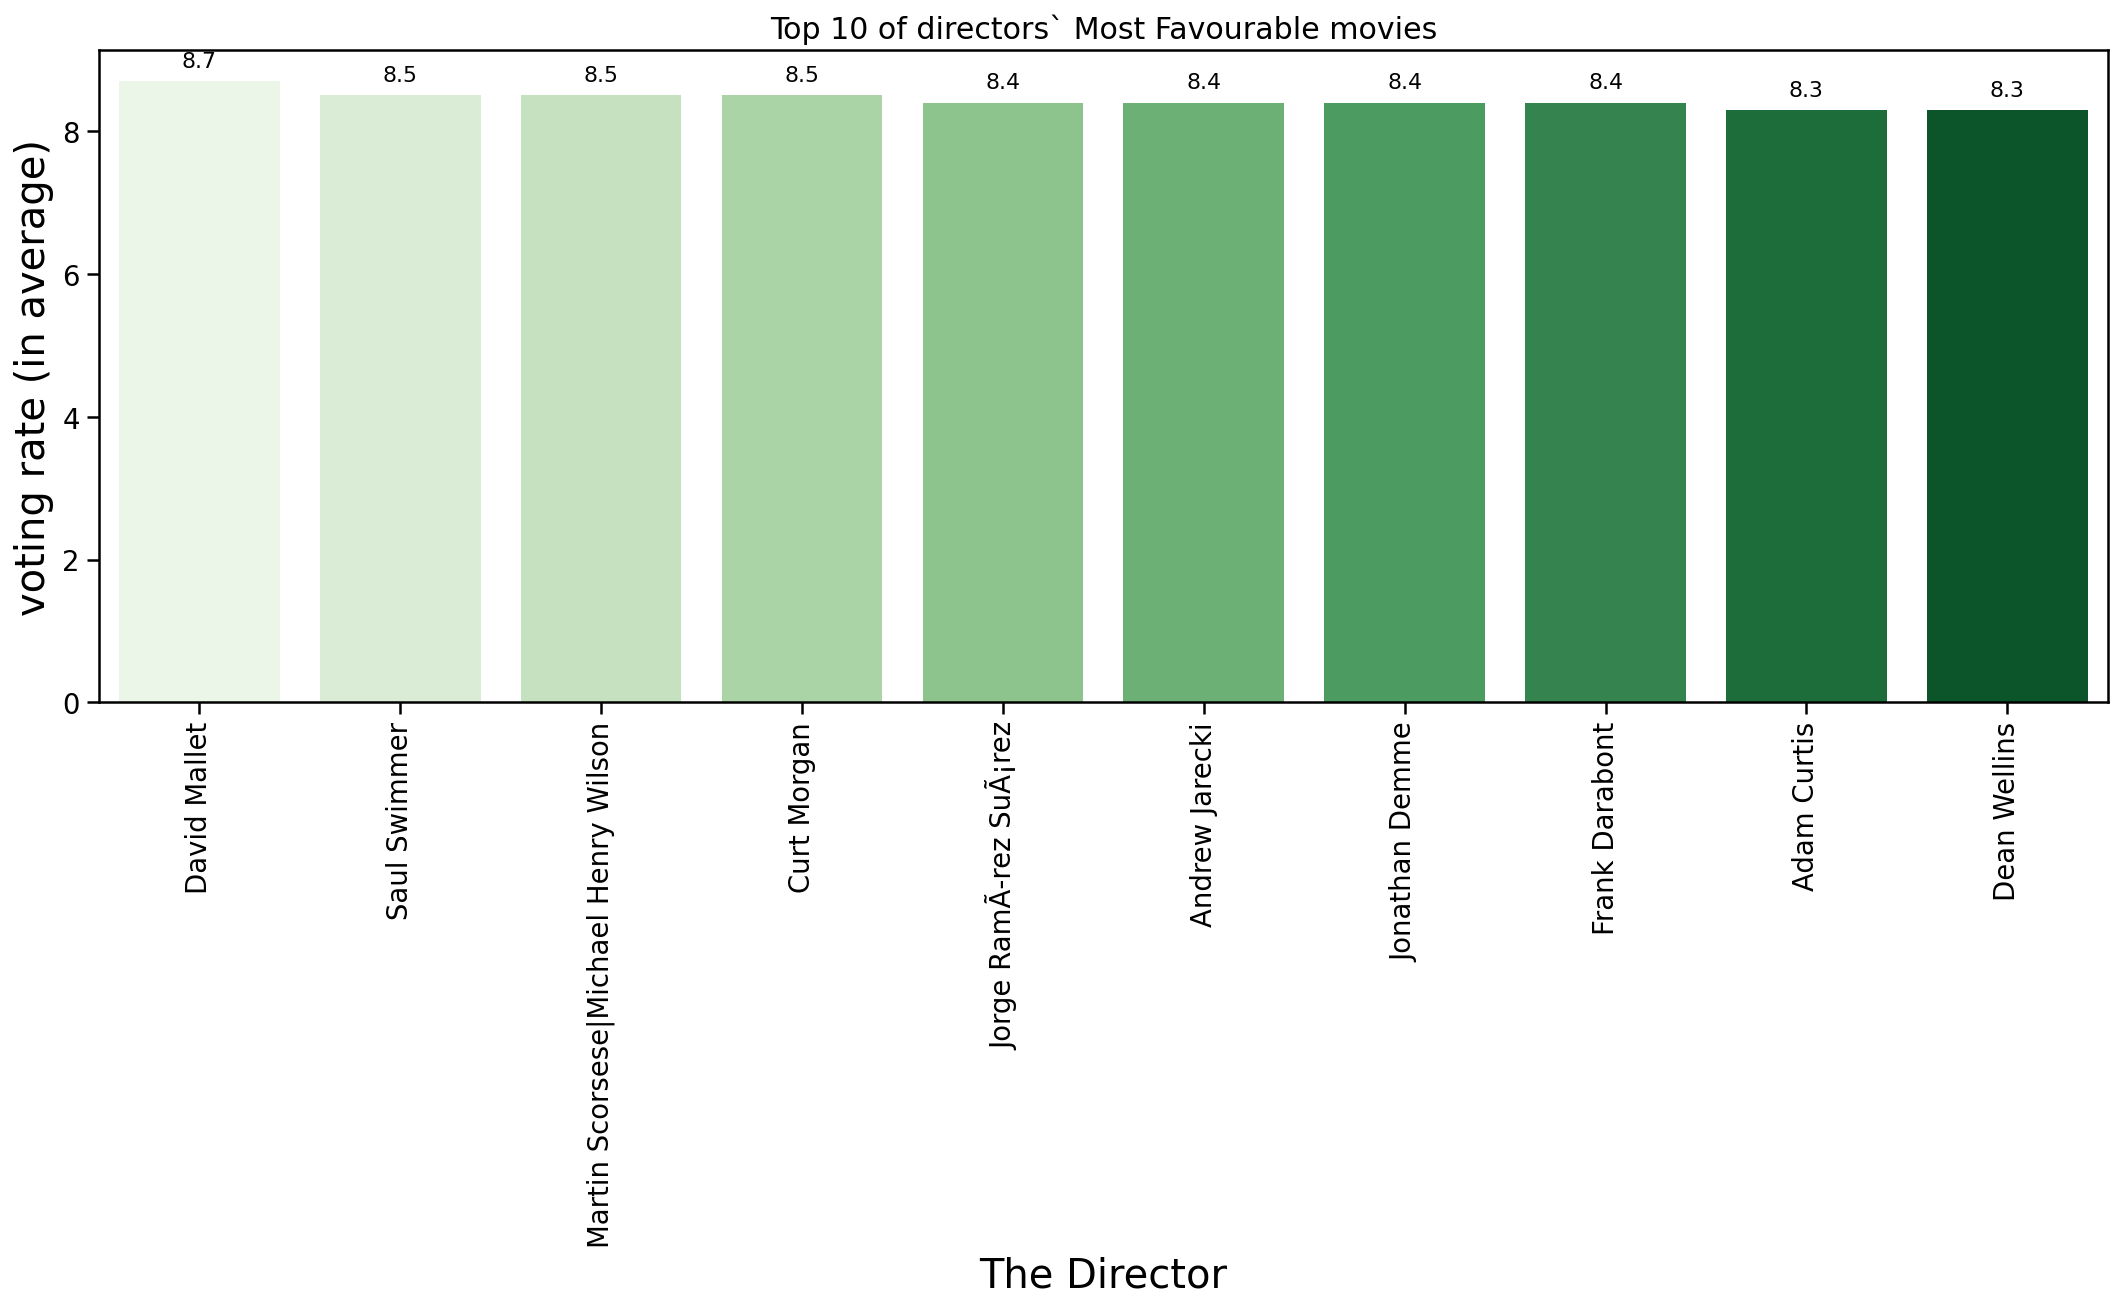

In [26]:
plt.figure(figsize=(18,6))
ddm = df[['director','vote_average']].sort_values('vote_average', ascending = False).head(10)
graphdm = sb.barplot(x='director', y='vote_average', data=ddm, palette='Greens')
plt.title('Top 10 of directors` Most Favourable movies')
plt.xlabel('The Director', fontsize=20)
plt.ylabel('voting rate (in average)', fontsize=20)
plt.xticks(rotation = 90)
for p in graphdm.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')
plt.show()

As shown above;
- The director (Mark Cousins) has produced the most favourable movies for the clients in the dataset; as he has a score of 9.2, followed by the director: (Jennifer Siebel Newsom) with a score of 8.9.
- Top 10 directors Most Favourable movies voting scores in the dataset ranges from 9.2 to 8.5; There are a sight difference between the 1st & the 10th favourable movie.
- Both movies directors (Leigh Scott) & (Harold) have the most unfavourable movie in the dataset; as both has a score of 1.5.

### Research Question 3  : How is the longer movie runtime preferable to the clients?

We can look at the association between the **runtime of the movie** and its **average vote** by graphing these values for the movies in the dataset to a scatter plot enhanced with a *line of best fit* (the red line) ;as follows:

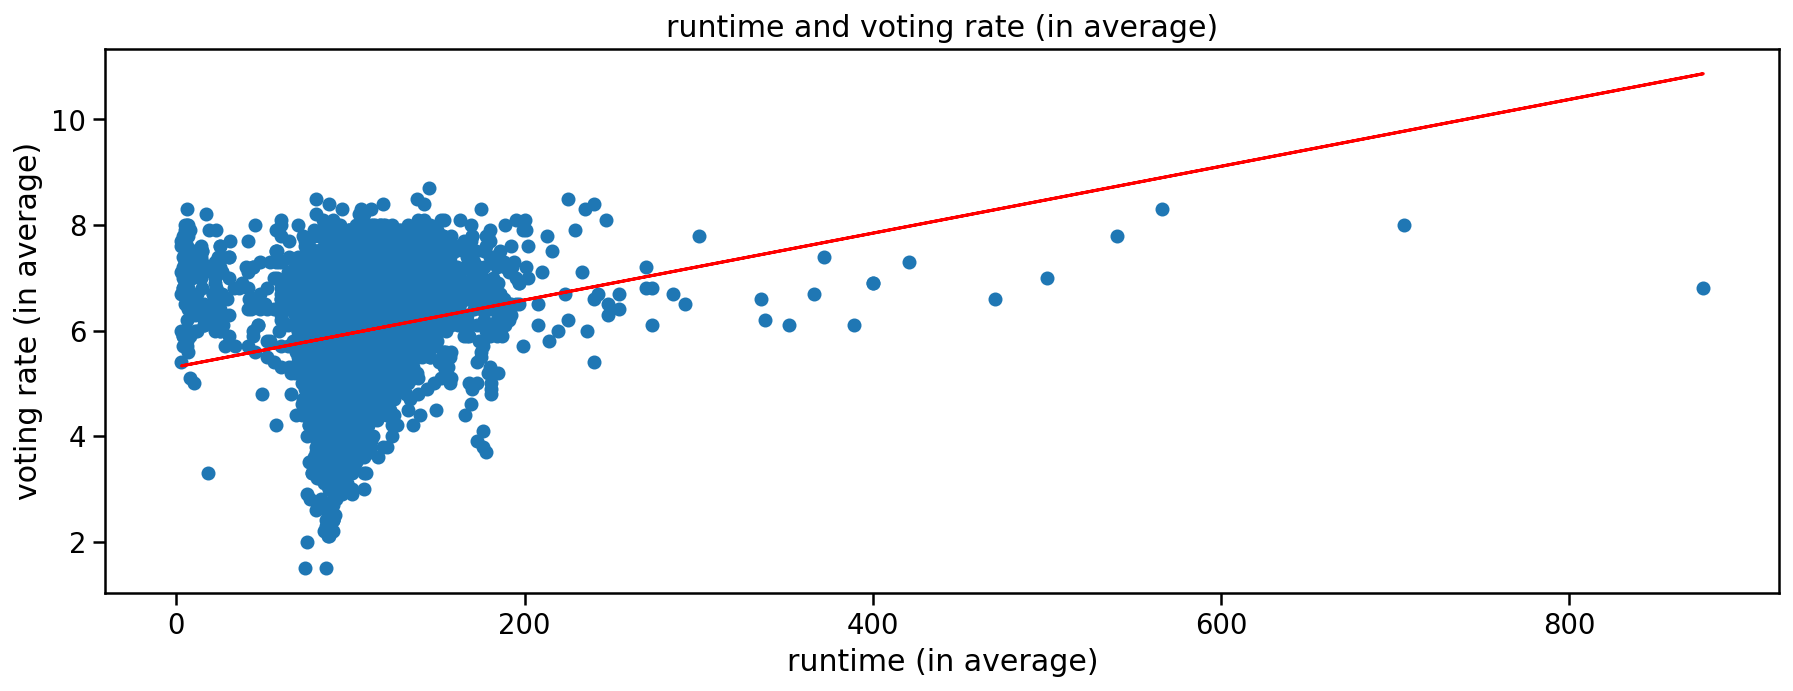

In [27]:
plt.figure(figsize = (15, 5))
graph = plt.scatter(df['runtime'], df['vote_average'])
plt.title('runtime and voting rate (in average)')
plt.xlabel('runtime (in average)')
plt.ylabel('voting rate (in average)')

plt.plot(df['runtime'], np.poly1d(np.polyfit(df['runtime'], df['vote_average'], 1))(df['runtime']), color = 'red')

plt.show()

As shown above;
- There is a strong positive relationship between the runtime of the movie and the voting rate -in average-.
- At/Before the 200-minute runtime movie; there is no obvious relationship as the voting rate varies at the same runtime. Thus, at that point the voting rate is not affected by the runtime only, but may be affected by other factors: (The quality of the movie direction, the competence of the cast members, etc.).
- However, After the 200-minute runtime movie; There are less number of movies in the dataset with that time duration, and also most of these movies have higher voting rates.
- As seen above in the dataset, there are 3 outliers above the 600-minute runtime, that have higher voting rates ranging between 6 & 9 score.

<a id='conclusions'></a>
## Conclusions

We can conclude these results from the Dataset Analysis to answer the questons; as follows:
- The movie (The Story of Film: An Odyssey) is the most favourable movie for the clients in the dataset; as it has a score of 9.2, followed by the movie (The Mask) with a score of 8.9.
- Top 10 favourable movies voting scores in the dataset ranges from 9.2 to 8.5; There are a sight difference between the 1st & the 10th favourable movie.
- Both movies (Transmorphers) & (Manos: The Hands of Fate) are the most unfavourable movie in the dataset; as both has a score of 1.5.
- The director (Mark Cousins) has produced the most favourable movies for the clients in the dataset; as he has a score of 9.2, followed by the director: (Jennifer Siebel Newsom) with a score of 8.9.
- Top 10 directors Most Favourable movies voting scores in the dataset ranges from 9.2 to 8.5; There are a sight difference between the 1st & the 10th favourable movie.
- Both movies directors (Leigh Scott) & (Harold) have the most unfavourable movie in the dataset; as both has a score of 1.5.
- There is a strong positive relationship between the runtime of the movie and the voting rate -in average-.
- At/Before the 200-minute runtime movie; there is no obvious relationship as the voting rate varies at the same runtime. Thus, at that point the voting rate is not affected by the runtime only, but may be affected by other factors: (The quality of the movie direction, the competence of the cast members, etc.).
- However, After the 200-minute runtime movie; There are less number of movies in the dataset with that time duration, and also most of these movies have higher voting rates.
- As seen above in the dataset, there are 3 outliers above the 600-minute runtime, that have higher voting rates ranging between 6 & 9 score.

## Limitations

This Dataset Analysis has limitations; as follows:
- Addressing Actors with the most appearances in films.
- Addressing Movies which had most and least profit.
- Exploring the Movie genres through the years of the dataset.
- Addressing Movies with largest and lowest budgets.
- Addressing Movies with most and least earned revenues.
- Addressing Movies with longest and shortest runtime values.
- Exploring Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?